In [2]:
'''
Hi! This script tests ZDR for hydrometeor spheroids at different diameters, but a constant axial ratio. 
It is intended to be used to analyze predictions of the spheroid model for snow aggregates using the T-matrix
method. 
-George Duffy, 2015
'''

'\nHi! This script tests ZDR for hydrometeor spheroids at different diameters, but a constant axial ratio. \nIt is intended to be used to analyze predictions of the spheroid model for snow aggregates using the T-matrix\nmethod. \n-George Duffy, 2015\n'

In [3]:
'''
Modules necessary for this script are pytmatrix, numpy, and pyplot
'''

%matplotlib inline
import matplotlib.pyplot as plt
from pytmatrix.tmatrix import Scatterer
from pytmatrix.psd import PSDIntegrator, GammaPSD, BinnedPSD
from pytmatrix import orientation, radar, tmatrix_aux, refractive
import numpy as np

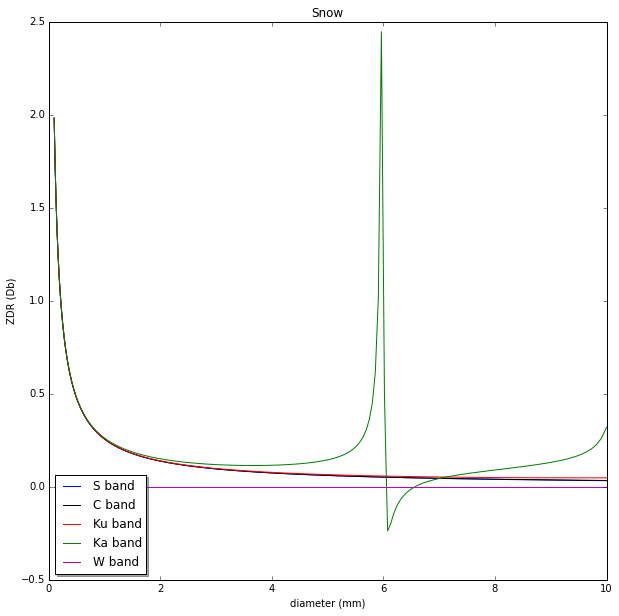

In [4]:
'''
Assigning variables, change axial ratio here if you want. Ar of 1 should simulate Mie spheres
'''
Rayleigh = []
flec1h, flec2h, flec3h, flec4h, flec5h = [], [], [], [], []
flec1v, flec2v, flec3v, flec4v, flec5v = [], [], [], [], []
ar = 0.6
dees = np.logspace(-1, 1, 500)



def mix(a, b, d, ar):
    '''
    I use the bruggeman mixing equation, at low densities of snowfall the decision between mixing
    equations is trivial. a and d are in cgs.
    '''
    m = a*d**b
    v = (1./6.)*ar*(d)**3*np.pi
    density = m/v
    n = 1.782
    kappa = complex(0, 7.302*10**-3)
    IceDens = .917
    e1 = n**2 - kappa**2
    e2 = 2*n*kappa
    B = e1 + e2
    f = density/IceDens
    mixed = (B*(1+2*f)-(2*f-2))/((2+f)+B*(1-f))
    e1out = np.real(mixed)
    e2out = np.imag(mixed)
    nout = np.sqrt((np.sqrt(e1out**2 +e2out**2)+e1out)/2)
    kout = np.sqrt((np.sqrt(e1out**2 +e2out**2)-e1out)/2)
    m =complex(nout, kout)
    return m

'''
Loop to generate cross sections
'''
for d in dees:
    dmod = d * (ar**(1./3.))
    mm = mix(0.004, 2.1, d*0.1, ar)
    oblate1 = Scatterer(radius = dmod/2., wavelength=tmatrix_aux.wl_S, m = mm, axis_ratio = 1/ar)
    oblate2 = Scatterer(radius = dmod/2., wavelength=tmatrix_aux.wl_C, m = mm, axis_ratio = 1/ar)
    oblate3 = Scatterer(radius = dmod/2., wavelength=tmatrix_aux.wl_Ku, m = mm, axis_ratio = 1/ar)
    oblate4 = Scatterer(radius = dmod/2., wavelength=tmatrix_aux.wl_Ka, m = mm, axis_ratio = 1/ar)
    oblate5 = Scatterer(radius = dmod/2., wavelength=tmatrix_aux.wl_W, m = mm, axis_ratio = 1/ar)
    
    flec1h.append(10*np.log10(radar.refl(oblate1)))
    flec2h.append(10*np.log10(radar.refl(oblate2)))
    flec3h.append(10*np.log10(radar.refl(oblate3)))
    flec4h.append(10*np.log10(radar.refl(oblate4)))
    flec5h.append(10*np.log10(radar.refl(oblate5)))

    flec1v.append(10*np.log10(radar.refl(oblate1, h_pol = False)))
    flec2v.append(10*np.log10(radar.refl(oblate2, h_pol = False)))
    flec3v.append(10*np.log10(radar.refl(oblate3, h_pol = False)))
    flec4v.append(10*np.log10(radar.refl(oblate4, h_pol = False)))
    flec5v.append(10*np.log10(radar.refl(oblate5, h_pol = False)))

    Z = (.176/.93*(6/(np.pi)/.917)**2*(.004*(d*0.1)**2.1)**2)*10**6;
    Rayleigh.append(10*np.log10( Z))

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111)
ax.plot(dees, np.array(flec1h)-np.array(flec1v))
ax.plot(dees, np.array(flec2h)-np.array(flec2v), 'k')
ax.plot(dees, np.array(flec3h)-np.array(flec3v), 'r')
ax.plot(dees, np.array(flec4h)-np.array(flec4v), 'g')
ax.plot(dees, np.array(flec5h)-np.array(flec5v), 'm')

ax.set_xlabel('diameter (mm)')
ax.set_ylabel('ZDR (Db)')
ax.set_title('Snow')
ax.legend(['S band', 'C band', 'Ku band', 'Ka band', 'W band'], loc = 'lower left', shadow = True)


In [5]:
plt.show()